# The Battle of the Neighborhoods in São Paulo City, Brazil.
# Introduction: Business Problem

In this project we will try to find another ways to make a new marketing campains by a segmentation method. This report will be targeted to people interested in suggest marketing contents, produce advertising and etc,  to the people tha lives in the Districts of São Paulo's Capital, Brazil.

We know that are lots of venues in the São Paulo City, therefore We will try figure out the business profile of each borough. Assuming that São Paulo is an alpha global city, We must to know what are the subject most reached by our costumers.

And finally, help them to make better buying decisions.

## Importing Libraries

In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy import Nominatim
import folium
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.') 

Libraries imported.


## Our Dataset

First of all We had made a Web Scraping from the Wikipedia tha is the font of our datas.

https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_São_Paulo_por_população

The step consists in develop another archive with the name: Webscraping.py. This script is responsable for extract the data and convert that in a Json file. 

Now We can import the df_sp.json with our DataFrame in Pandas.

In [2]:
df = pd.read_json('df_sp.json')
df

,Districts,Population
0,Grajaú,360.787
1,Jardim Ângela,295.434
2,Sapopemba,284.524
3,Capão Redondo,268.729
4,Jardim São Luís,267.871
...,...,...
92,Sé,23.651
93,Pari,17.299
94,Barra Funda,14.383
95,Marsilac,8.258


In [3]:
df = df.dropna()

In [4]:
df['Address'] = df['Districts']+' São Paulo Brasil'

C:\Users\Ale Souza\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Manipulation the dataframe to discover the coordinates of the  districts

In [5]:
df

,Districts,Population,Address
0,Grajaú,360.787,Grajaú São Paulo Brasil
1,Jardim Ângela,295.434,Jardim Ângela São Paulo Brasil
2,Sapopemba,284.524,Sapopemba São Paulo Brasil
3,Capão Redondo,268.729,Capão Redondo São Paulo Brasil
4,Jardim São Luís,267.871,Jardim São Luís São Paulo Brasil
...,...,...,...
91,Jaguara,24.895,Jaguara São Paulo Brasil
92,Sé,23.651,Sé São Paulo Brasil
93,Pari,17.299,Pari São Paulo Brasil
94,Barra Funda,14.383,Barra Funda São Paulo Brasil


In [6]:
# Use Geopy to fetch geocode data
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sp_explorer")

for i in df.index:
    try:
        #tries fetch address from geopy
        location = geolocator.geocode(df['Address'][i])
        
        #append lat/log to column using dataframe location
        df.loc[i, 'Latitude'] = location.latitude
        df.loc[i, 'Longitude'] = location.longitude
    except:
        #catches exception for the case where no value is returned
        #appends null value to column
        df.loc[i, 'Latitude'] = "null"
        df.loc[i, 'Longitude'] = "null"
        
#print first rows as sample
df.head(100)

C:\Users\Ale Souza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ale Souza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Districts,Population,Address,Latitude,Longitude
0,Grajaú,360.787,Grajaú São Paulo Brasil,-23.785907,-46.665197
1,Jardim Ângela,295.434,Jardim Ângela São Paulo Brasil,-23.712528,-46.768720
2,Sapopemba,284.524,Sapopemba São Paulo Brasil,-23.604326,-46.509885
3,Capão Redondo,268.729,Capão Redondo São Paulo Brasil,-23.671903,-46.779435
4,Jardim São Luís,267.871,Jardim São Luís São Paulo Brasil,-23.683573,-46.737762
...,...,...,...,...,...
91,Jaguara,24.895,Jaguara São Paulo Brasil,-23.507446,-46.755315
92,Sé,23.651,Sé São Paulo Brasil,-23.550651,-46.633382
93,Pari,17.299,Pari São Paulo Brasil,-23.532976,-46.615849
94,Barra Funda,14.383,Barra Funda São Paulo Brasil,-23.525462,-46.667513


In [7]:
df.dtypes

Districts      object
Population    float64
Address        object
Latitude      float64
Longitude     float64
dtype: object

### Now We will utilize the Foursquare API to figure out the Latitude and Longitute. 
### The next step is to plot the Maps through the Folium Library

In [8]:
CLIENT_ID = 'ZYWADMT42YG34PJ0VP35KYUW2O2CP5B4DAHRZAFB50K5CFTA' # your Foursquare ID
CLIENT_SECRET = 'HECPR1B52DIXND5DPGS4ZSRCBULKQ3SXTR0TCUFYROPT2RPX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZYWADMT42YG34PJ0VP35KYUW2O2CP5B4DAHRZAFB50K5CFTA
CLIENT_SECRET:HECPR1B52DIXND5DPGS4ZSRCBULKQ3SXTR0TCUFYROPT2RPX


In [9]:
address = 'São Paulo City, SP'

geolocator = Nominatim(user_agent="sp_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('As cordenadas para São Paulo são {}, {}.'.format(latitude, longitude))

As cordenadas para São Paulo são -23.5506507, -46.6333824.


In [10]:
# create map of Manhattan using latitude and longitude values
map_sp = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Districts']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
    
map_sp

In [11]:
df.shape

(96, 5)

In [12]:
population = df['Population'].sum()
districts = df['Districts'].count()
print("A Capital de São Paulo possui", districts, "distritos e", population, "pessoas")

A Capital de São Paulo possui 96 distritos e 11238.690000000002 pessoas


In [13]:
df.loc[0, 'Districts']

'Grajaú'

In [14]:
sp_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
sp_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

sp_nome = df.loc[0, 'Districts'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(sp_nome, 
                                                               sp_latitude, 
                                                               sp_longitude))

Latitude and longitude values of Grajaú are -23.78590725, -46.66519713060974.


## Creating a New Dataset with the 200 nearby venues that was returned by Foursqure API 

In [15]:
# type your answer here
LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 100000 # define radius


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    sp_latitude, 
    sp_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ZYWADMT42YG34PJ0VP35KYUW2O2CP5B4DAHRZAFB50K5CFTA&client_secret=HECPR1B52DIXND5DPGS4ZSRCBULKQ3SXTR0TCUFYROPT2RPX&v=20180605&ll=-23.78590725,-46.66519713060974&radius=100000&limit=200'

In [16]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603eeb2fd04a1924df1f76a5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'São Paulo',
  'headerFullLocation': 'São Paulo',
  'headerLocationGranularity': 'city',
  'totalResults': 227,
  'suggestedBounds': {'ne': {'lat': -22.8859063499991,
    'lng': -45.68348928955447},
   'sw': {'lat': -24.685908150000902, 'lng': -47.64690497166501}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b81bc7af964a520edba30e3',
       'name': 'Ofner',
       'location': {'address': 'R. Olívia Guedes Penteado, 375',
        'crossStreet': 'R. Antônio Francisco França',
        'lat': -23.669998818167205,
        'lng': -46.71138736231922,
        'labeledLatLngs

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
from pandas.io.json import json_normalize 
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

C:\Users\Ale Souza\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Ofner,Dessert Shop,-23.669999,-46.711387
1,Parque da Juventude Città Di Maróstica,Skate Park,-23.697099,-46.549651
2,Parque Severo Gomes,Park,-23.646914,-46.718936
3,Jardim Botânico de São Paulo,Botanical Garden,-23.639119,-46.626204
4,Sonda Supermercados,Supermarket,-23.660019,-46.571291
5,Palácio Tangará,Hotel,-23.632152,-46.722919
6,Associação Atlética Banco do Brasil (AABB),Athletics & Sports,-23.649957,-46.752272
7,Bacio di Latte,Ice Cream Shop,-23.622474,-46.698722
8,Záffari Hipermercado,Big Box Store,-23.632101,-46.737020
9,Agello Cucina,Italian Restaurant,-23.626143,-46.669758


In [19]:
print('{} Estabelecimentos foram retornados pelo Foursquare.'.format(nearby_venues.shape[0]))

100 Estabelecimentos foram retornados pelo Foursquare.


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'sp Latitude', 
                  'sp Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# type your answer here
sp_venues = getNearbyVenues(names=df['Districts'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Grajaú
Jardim Ângela
Sapopemba
Capão Redondo
Jardim São Luís
Cidade Ademar
Brasilândia
Sacomã
Itaim Paulista
Jabaquara
Cidade Tiradentes
Campo Limpo
Itaquera
Tremembé
Cidade Dutra
Jaraguá
Lajeado
Pirituba
São Mateus
Vila Curuçá
Pedreira
São Rafael
Cachoeirinha
Vila Jacuí
São Lucas
Freguesia do Ó
Cangaíba
Jardim Helena
Parelheiros
Saúde
Vila Mariana
Vila Medeiros
Penha
Iguatemi
Vila Andrade
Cidade Líder
José Bonifácio
Santana
Rio Pequeno
Ermelino Matarazzo
Vila Maria
Perdizes
Cursino
Vila Sônia
Mandaqui
Ipiranga
Artur Alvim
Vila Matilde
Vila Prudente
Guaianases
Campo Grande
Raposo Tavares
Tucuruvi
Vila Formosa
Jaçanã
Ponte Rasa
Itaim Bibi
São Miguel Paulista
Tatuapé
Aricanduva
Jardim Paulista
Casa Verde
Água Rasa
São Domingos
Santa Cecília
Moema
Carrão
Limão
Perus
Santo Amaro
Bela Vista
Liberdade
Parque do Carmo
Anhanguera
Lapa
Pinheiros
Mooca
Campo Belo
Consolação
Vila Guilherme
Butantã
República
Jaguaré
Morumbi
Belém
Alto de Pinheiros
Vila Leopoldina
Socorro
Cambuci
Bom Retiro
Brás
Ja

In [22]:
print(sp_venues.shape)
sp_venues.head()

(2704, 7)


,Neighborhood,sp Latitude,sp Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jardim Ângela,-23.712528,-46.768720,Cida Manicure,-23.715485,-46.769722,Health & Beauty Service
1,Jardim Ângela,-23.712528,-46.768720,Pastéis Suely,-23.716364,-46.769401,Pastelaria
2,Jardim Ângela,-23.712528,-46.768720,Padaria Nova Aracati,-23.716672,-46.767894,Bakery
3,Sapopemba,-23.604326,-46.509885,Academia Vigor,-23.604081,-46.509578,Gym
4,Sapopemba,-23.604326,-46.509885,Bar 1 Conto,-23.607670,-46.510774,Gastropub


In [23]:
sp_venues.groupby('Neighborhood').count()

,sp Latitude,sp Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alto de Pinheiros,10,10,10,10,10,10
Anhanguera,9,9,9,9,9,9
Aricanduva,6,6,6,6,6,6
Artur Alvim,18,18,18,18,18,18
Barra Funda,39,39,39,39,39,39
...,...,...,...,...,...,...
Vila Matilde,40,40,40,40,40,40
Vila Medeiros,15,15,15,15,15,15
Vila Prudente,41,41,41,41,41,41


In [24]:
print('There are {} uniques categories.'.format(len(sp_venues['Venue Category'].unique())))

There are 290 uniques categories.


## How we know, To work with Machine Learning, It is necessary to convert the categorical variables into numerical variables.

In [25]:
# one hot encoding
sp_onehot = pd.get_dummies(sp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sp_onehot['Neighborhood'] = sp_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sp_onehot.columns[-1]] + list(sp_onehot.columns[:-1])
sp_onehot = sp_onehot[fixed_columns]

sp_onehot.head(100)

,Neighborhood,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Jardim Ângela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jardim Ângela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jardim Ângela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sapopemba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sapopemba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Itaim Paulista,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,Itaim Paulista,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Jabaquara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Jabaquara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
sp_onehot.shape

(2704, 291)

In [27]:
sp_grouped = sp_onehot.groupby('Neighborhood').mean().reset_index()
sp_grouped

,Neighborhood,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alto de Pinheiros,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0
1,Anhanguera,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0
2,Aricanduva,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0
3,Artur Alvim,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0
4,Barra Funda,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Vila Matilde,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.00000,0.0
88,Vila Medeiros,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0
89,Vila Prudente,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.02439,0.0
90,Vila Sônia,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00000,0.0


In [28]:
sp_grouped.shape

(92, 291)

In [29]:
num_top_venues = 5

for hood in sp_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sp_grouped[sp_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alto de Pinheiros----
                      venue  freq
0                     Plaza   0.4
1                      Café   0.1
2  Bike Rental / Bike Share   0.1
3                       Spa   0.1
4                   Dog Run   0.1


----Anhanguera----
                  venue  freq
0  Gym / Fitness Center  0.22
1                Bakery  0.11
2         Grocery Store  0.11
3                 Plaza  0.11
4     Convenience Store  0.11


----Aricanduva----
                  venue  freq
0                Bakery  0.33
1        Clothing Store  0.17
2           Candy Store  0.17
3  Gym / Fitness Center  0.17
4         Grocery Store  0.17


----Artur Alvim----
              venue  freq
0  Department Store  0.11
1       Pizza Place  0.11
2            Bakery  0.06
3    Cosmetics Shop  0.06
4          Pharmacy  0.06


----Barra Funda----
                  venue  freq
0            Restaurant  0.10
1           Music Venue  0.10
2  Brazilian Restaurant  0.08
3                  Café  0.05
4        Chocolate

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Now We return the Top Venues of São Paulo's Capital returned by Foursquare API

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sp_grouped['Neighborhood']

for ind in np.arange(sp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto de Pinheiros,Plaza,Dog Run,Bike Rental / Bike Share,Café,Gym / Fitness Center,Trail,Spa,Department Store,Dessert Shop,French Restaurant
1,Anhanguera,Gym / Fitness Center,Plaza,Ice Cream Shop,Bakery,Pizza Place,Convenience Store,Grocery Store,Pet Store,Fish & Chips Shop,Escape Room
2,Aricanduva,Bakery,Clothing Store,Gym / Fitness Center,Candy Store,Grocery Store,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
3,Artur Alvim,Pizza Place,Department Store,Newsstand,Grocery Store,Beer Garden,Bar,Bakery,Gymnastics Gym,Pastelaria,Chinese Restaurant
4,Barra Funda,Music Venue,Restaurant,Brazilian Restaurant,Café,Sandwich Place,Chocolate Shop,Country Dance Club,Nightclub,Office,Museum


## It's interesting We figure out the Best K number for a Clustering Algorithm. In this case, We are using K-Means algorithm and the number of K represents the best quantities of Clusters may use for.

In [32]:
!pip install yellowbrick

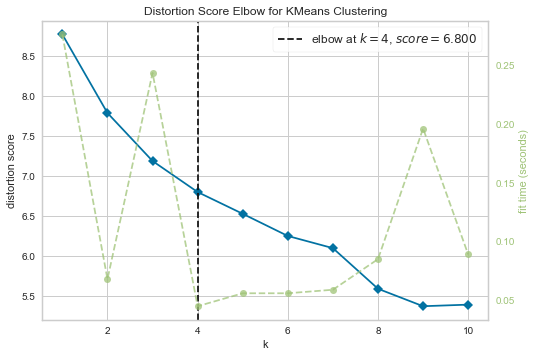

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

sp_part_clustering = sp_grouped.drop("Neighborhood", 1)

#instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(sp_part_clustering)
visualizer.poof() #draw/show/ poof the data

## We might have used the Elbow Method. This Approach is very common used with the K-means Clustering. So We have got that K is equal 6.

In [34]:
# set number of clusters
kclusters = 6

sp_grouped_clustering = sp_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 2, 2, 2, 2, 2, 4, 2])

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sp_merged = df

In [36]:
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
sp_merged = sp_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Districts')

In [37]:
sp_merged.head() # check the last columns!

,Districts,Population,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Grajaú,360.787,Grajaú São Paulo Brasil,-23.785907,-46.665197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jardim Ângela,295.434,Jardim Ângela São Paulo Brasil,-23.712528,-46.768720,1.0,Bakery,Health & Beauty Service,Pastelaria,Flea Market,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
2,Sapopemba,284.524,Sapopemba São Paulo Brasil,-23.604326,-46.509885,2.0,Breakfast Spot,Gastropub,Market,Gym,Grocery Store,Flea Market,Food,Pharmacy,Japanese Restaurant,Falafel Restaurant
3,Capão Redondo,268.729,Capão Redondo São Paulo Brasil,-23.671903,-46.779435,2.0,Park,Soccer Field,Flea Market,Pharmacy,Food Stand,Food Court,Food & Drink Shop,Food Truck,Food,Empanada Restaurant
4,Jardim São Luís,267.871,Jardim São Luís São Paulo Brasil,-23.683573,-46.737762,2.0,Japanese Restaurant,Playground,Pizza Place,Department Store,Bus Station,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


In [38]:
sp_merged.isnull().sum()

Districts                 0
Population                0
Address                   0
Latitude                  0
Longitude                 0
Cluster Labels            4
1st Most Common Venue     4
2nd Most Common Venue     4
3rd Most Common Venue     4
4th Most Common Venue     4
5th Most Common Venue     4
6th Most Common Venue     4
7th Most Common Venue     4
8th Most Common Venue     4
9th Most Common Venue     4
10th Most Common Venue    4
dtype: int64

In [39]:
sp_merged = sp_merged.dropna()

In [40]:
sp_merged

,Districts,Population,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Jardim Ângela,295.434,Jardim Ângela São Paulo Brasil,-23.712528,-46.768720,1.0,Bakery,Health & Beauty Service,Pastelaria,Flea Market,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
2,Sapopemba,284.524,Sapopemba São Paulo Brasil,-23.604326,-46.509885,2.0,Breakfast Spot,Gastropub,Market,Gym,Grocery Store,Flea Market,Food,Pharmacy,Japanese Restaurant,Falafel Restaurant
3,Capão Redondo,268.729,Capão Redondo São Paulo Brasil,-23.671903,-46.779435,2.0,Park,Soccer Field,Flea Market,Pharmacy,Food Stand,Food Court,Food & Drink Shop,Food Truck,Food,Empanada Restaurant
4,Jardim São Luís,267.871,Jardim São Luís São Paulo Brasil,-23.683573,-46.737762,2.0,Japanese Restaurant,Playground,Pizza Place,Department Store,Bus Station,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
5,Cidade Ademar,266.681,Cidade Ademar São Paulo Brasil,-23.673012,-46.655281,1.0,Music Venue,Fried Chicken Joint,Bakery,Gymnastics Gym,Flower Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Brás,29.265,Brás São Paulo Brasil,-23.545326,-46.616444,2.0,Brazilian Restaurant,Clothing Store,Pizza Place,Park,Burger Joint,Furniture / Home Store,Gaming Cafe,Café,Shoe Store,Sandwich Place
91,Jaguara,24.895,Jaguara São Paulo Brasil,-23.507446,-46.755315,1.0,Bakery,Gym,Soccer Field,Seafood Restaurant,Flower Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market
92,Sé,23.651,Sé São Paulo Brasil,-23.550651,-46.633382,2.0,Brazilian Restaurant,Bookstore,Miscellaneous Shop,Cosmetics Shop,Bakery,Music Venue,Chocolate Shop,Japanese Restaurant,Arts & Crafts Store,Vegetarian / Vegan Restaurant
93,Pari,17.299,Pari São Paulo Brasil,-23.532976,-46.615849,2.0,Clothing Store,Brazilian Restaurant,Middle Eastern Restaurant,Restaurant,Shopping Mall,Café,Falafel Restaurant,Warehouse Store,Bar,Hotel


In [41]:
sp_merged["Cluster Labels"] = sp_merged["Cluster Labels"].astype(int)

In [42]:
sp_merged

,Districts,Population,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Jardim Ângela,295.434,Jardim Ângela São Paulo Brasil,-23.712528,-46.768720,1,Bakery,Health & Beauty Service,Pastelaria,Flea Market,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
2,Sapopemba,284.524,Sapopemba São Paulo Brasil,-23.604326,-46.509885,2,Breakfast Spot,Gastropub,Market,Gym,Grocery Store,Flea Market,Food,Pharmacy,Japanese Restaurant,Falafel Restaurant
3,Capão Redondo,268.729,Capão Redondo São Paulo Brasil,-23.671903,-46.779435,2,Park,Soccer Field,Flea Market,Pharmacy,Food Stand,Food Court,Food & Drink Shop,Food Truck,Food,Empanada Restaurant
4,Jardim São Luís,267.871,Jardim São Luís São Paulo Brasil,-23.683573,-46.737762,2,Japanese Restaurant,Playground,Pizza Place,Department Store,Bus Station,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
5,Cidade Ademar,266.681,Cidade Ademar São Paulo Brasil,-23.673012,-46.655281,1,Music Venue,Fried Chicken Joint,Bakery,Gymnastics Gym,Flower Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Brás,29.265,Brás São Paulo Brasil,-23.545326,-46.616444,2,Brazilian Restaurant,Clothing Store,Pizza Place,Park,Burger Joint,Furniture / Home Store,Gaming Cafe,Café,Shoe Store,Sandwich Place
91,Jaguara,24.895,Jaguara São Paulo Brasil,-23.507446,-46.755315,1,Bakery,Gym,Soccer Field,Seafood Restaurant,Flower Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market
92,Sé,23.651,Sé São Paulo Brasil,-23.550651,-46.633382,2,Brazilian Restaurant,Bookstore,Miscellaneous Shop,Cosmetics Shop,Bakery,Music Venue,Chocolate Shop,Japanese Restaurant,Arts & Crafts Store,Vegetarian / Vegan Restaurant
93,Pari,17.299,Pari São Paulo Brasil,-23.532976,-46.615849,2,Clothing Store,Brazilian Restaurant,Middle Eastern Restaurant,Restaurant,Shopping Mall,Café,Falafel Restaurant,Warehouse Store,Bar,Hotel


## Now We have a new map with the clusters separated by colors. It's simply wonderful! 

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sp_merged['Latitude'], sp_merged['Longitude'], sp_merged['Districts'], sp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Now We can understand witch is the classes of the venues in the districts of São Paulos's Capital

In [44]:
sp_merged.loc[sp_merged['Cluster Labels'] == 0, sp_merged.columns[[1] + list(range(5, sp_merged.shape[1]))]]

,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,127.015,0,Gym / Fitness Center,Pet Store,Market,Gym,Residential Building (Apartment / Condo),Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
73,65.859,0,Gym / Fitness Center,Plaza,Ice Cream Shop,Bakery,Pizza Place,Convenience Store,Grocery Store,Pet Store,Fish & Chips Shop,Escape Room


In [45]:
sp_merged.loc[sp_merged['Cluster Labels'] == 1, sp_merged.columns[[1] + list(range(5, sp_merged.shape[1]))]]

,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,295.434,1,Bakery,Health & Beauty Service,Pastelaria,Flea Market,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
5,266.681,1,Music Venue,Fried Chicken Joint,Bakery,Gymnastics Gym,Flower Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market
15,184.818,1,Bakery,Convenience Store,Grocery Store,Gym / Fitness Center,Farmers Market,Pet Store,Arts & Crafts Store,Brazilian Restaurant,Italian Restaurant,Diner
26,136.623,1,Bakery,Chocolate Shop,Gym / Fitness Center,Café,Pharmacy,Food Stand,Food Court,Food & Drink Shop,Food,Food Truck
28,131.183,1,Brazilian Restaurant,Nature Preserve,Snack Place,Bakery,French Restaurant,Frame Store,Food Truck,Fried Chicken Joint,Food Stand,Falafel Restaurant
42,109.088,1,Brazilian Restaurant,Bakery,Market,Food & Drink Shop,Farmers Market,Gym,Gym / Fitness Center,Paper / Office Supplies Store,Furniture / Home Store,Pizza Place
43,108.441,1,Bakery,Skate Park,Farmers Market,Grocery Store,Gourmet Shop,Food & Drink Shop,Gym / Fitness Center,Motorcycle Shop,Deli / Bodega,Pizza Place
50,100.713,1,Brazilian Restaurant,Dessert Shop,Gym / Fitness Center,Pharmacy,Convenience Store,Bakery,Gym,Farmers Market,Chocolate Shop,Candy Store
57,92.081,1,Bakery,Fruit & Vegetable Store,Grocery Store,Gym,Japanese Restaurant,Breakfast Spot,Pizza Place,Dessert Shop,Convenience Store,Market
59,89.622,1,Bakery,Clothing Store,Gym / Fitness Center,Candy Store,Grocery Store,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


In [46]:
sp_merged.loc[sp_merged['Cluster Labels'] == 2, sp_merged.columns[[1] + list(range(5, sp_merged.shape[1]))]]

,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,284.524,2,Breakfast Spot,Gastropub,Market,Gym,Grocery Store,Flea Market,Food,Pharmacy,Japanese Restaurant,Falafel Restaurant
3,268.729,2,Park,Soccer Field,Flea Market,Pharmacy,Food Stand,Food Court,Food & Drink Shop,Food Truck,Food,Empanada Restaurant
4,267.871,2,Japanese Restaurant,Playground,Pizza Place,Department Store,Bus Station,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
7,247.851,2,Pharmacy,Bar,Brazilian Restaurant,Department Store,Cosmetics Shop,Clothing Store,Chocolate Shop,Farmers Market,Sports Bar,Gym Pool
8,224.074,2,Japanese Restaurant,Bakery,Food Truck,Bowling Alley,Dessert Shop,Gym / Fitness Center,Pizza Place,Brewery,Brazilian Restaurant,Food & Drink Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
89,33.892,2,Korean Restaurant,Brazilian Restaurant,Women's Store,Dessert Shop,Café,Bar,Coffee Shop,Grocery Store,Bakery,Convenience Store
90,29.265,2,Brazilian Restaurant,Clothing Store,Pizza Place,Park,Burger Joint,Furniture / Home Store,Gaming Cafe,Café,Shoe Store,Sandwich Place
92,23.651,2,Brazilian Restaurant,Bookstore,Miscellaneous Shop,Cosmetics Shop,Bakery,Music Venue,Chocolate Shop,Japanese Restaurant,Arts & Crafts Store,Vegetarian / Vegan Restaurant
93,17.299,2,Clothing Store,Brazilian Restaurant,Middle Eastern Restaurant,Restaurant,Shopping Mall,Café,Falafel Restaurant,Warehouse Store,Bar,Hotel


In [47]:
sp_merged.loc[sp_merged['Cluster Labels'] == 3, sp_merged.columns[[1] + list(range(5, sp_merged.shape[1]))]]

,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,143.992,3,Bar,Park,Brewery,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop
63,84.843,3,Bar,Chinese Restaurant,Gym / Fitness Center,Burger Joint,Diner,Snack Place,Flea Market,Food,Fast Food Restaurant,Fish & Chips Shop
72,68.258,3,Brazilian Restaurant,Bar,Planetarium,IT Services,Food & Drink Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop
76,63.133,3,Bar,Burger Joint,Mexican Restaurant,Japanese Restaurant,Gym / Fitness Center,Acai House,Chinese Restaurant,Middle Eastern Restaurant,Brewery,Snack Place


In [48]:
sp_merged.loc[sp_merged['Cluster Labels'] == 4, sp_merged.columns[[1] + list(range(5, sp_merged.shape[1]))]]

,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,264.918,4,Farmers Market,Food Truck,Big Box Store,Yoga Studio,Food & Drink Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food
27,135.043,4,Food Truck,Brazilian Restaurant,Gym,Grocery Store,Restaurant,Big Box Store,Comfort Food Restaurant,Burger Joint,Pizza Place,Food Stand
51,100.164,4,Food Truck,Yoga Studio,Food,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop


In [51]:
sp_merged.loc[sp_merged['Cluster Labels'] == 5, sp_merged.columns[[1] + list(range(5, sp_merged.shape[1]))]]

,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,118.797,5,Southern Brazilian Restaurant,Gym,Snack Place,Yoga Studio,Flower Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market


## Conclusion

Finally We can see the different categories of the Venues in our dataset. 
So, How can this study help us? 

With those tools We will able to make recommendations to each public in each clustering. We may use the neighborhood, distance, the position in the map, the various combination of informations to suggest the best product or service to our clients. 

It is a good way to construct a New marketing campain to your constumers. Dada help us to understand our public and get less mistakes than other market players.
